# Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the dataset
data_path = "C:\\Users\\kiran\\Desktop\\infosys Intern\\final_adjusted_crowd_dataset.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()

,Longitude,Latitude,Speed,Distance,Time,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,label
0,73.822661,18.501627,0.0,0.0,18-45-12,0.046402,-0.137178,-0.282934,352.0,-0.036306,-0.008226,-0.023416,0
1,73.822661,18.501627,0.0,0.0,18-45-12,-0.136978,0.365242,0.108889,352.0,0.035776,-0.009448,0.009570,0
2,73.822661,18.501627,0.0,0.0,18-45-13,-0.045355,-0.103340,-0.534985,352.0,-0.011871,-0.027774,0.003462,0
3,73.822661,18.501627,0.0,0.0,18-45-13,0.242089,0.072761,-0.350396,352.0,-0.017980,0.002769,-0.005091,0
4,73.822661,18.501627,0.0,0.0,18-45-13,-0.230234,0.011765,-0.494085,352.0,0.011342,0.003380,0.006516,0


# Define Function for Isolation Forest Model with Hyperparameter Testing

In [2]:
# Define function to apply Isolation Forest with different contamination rates and estimator values
def isolation_forest_with_params(data, contamination_rates, estimator_counts):
    results = []  # Store results for each parameter combination
    for contamination in contamination_rates:
        for n_estimators in estimator_counts:
            # Initialize and fit Isolation Forest
            iso_forest = IsolationForest(contamination=contamination, n_estimators=n_estimators, random_state=42)
            data['anomaly_score'] = iso_forest.fit_predict(data[['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']])
            
            # Count anomalies
            num_anomalies = (data['anomaly_score'] == -1).sum()
            results.append({'Contamination Rate': contamination, 'Number of Estimators': n_estimators, 'Number of Anomalies Detected': num_anomalies})
            
            # Plot anomaly scores over time
            plt.figure(figsize=(10, 4))
            plt.plot(data.index, iso_forest.decision_function(data[['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']]), label=f'Contamination={contamination}, Estimators={n_estimators}')
            plt.xlabel('Time')
            plt.ylabel('Anomaly Score')
            plt.title(f'Isolation Forest Anomaly Scores Over Time\nContamination={contamination}, Estimators={n_estimators}')
            plt.legend()
            plt.show()
    
    return pd.DataFrame(results)

# Define the parameters to test
contamination_rates = [0.01, 0.05, 0.1]
estimator_counts = [50, 100, 200]


# Run the Isolation Forest Model with Different Hyperparameters and Display Results

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


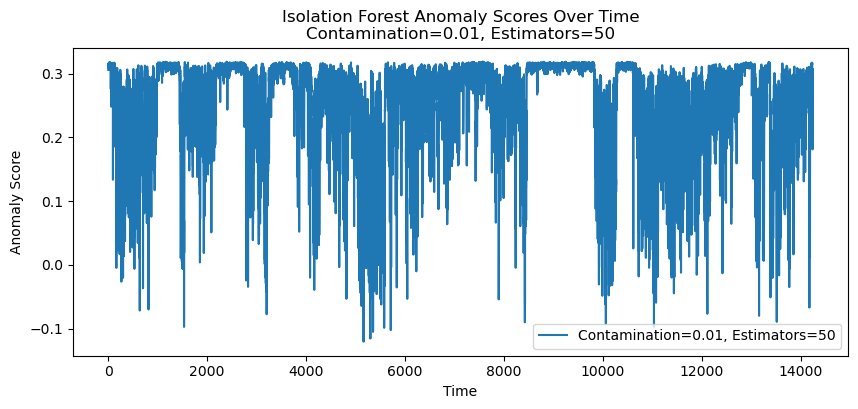

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


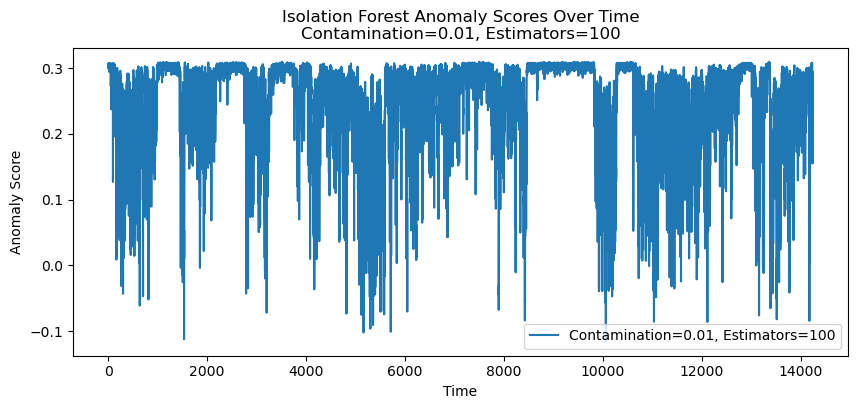

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


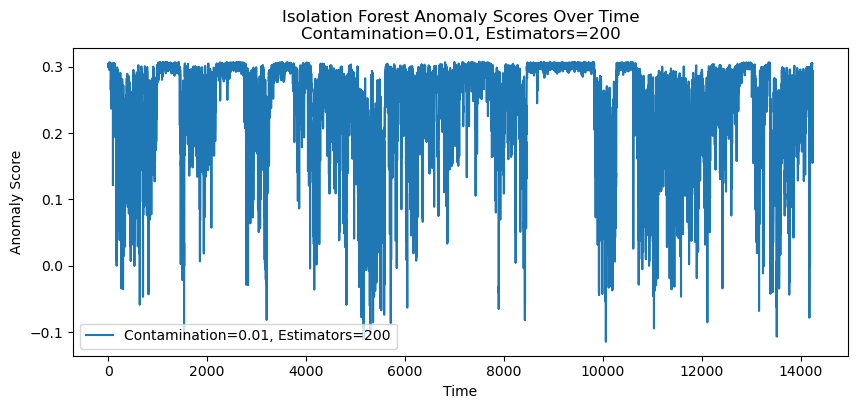

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


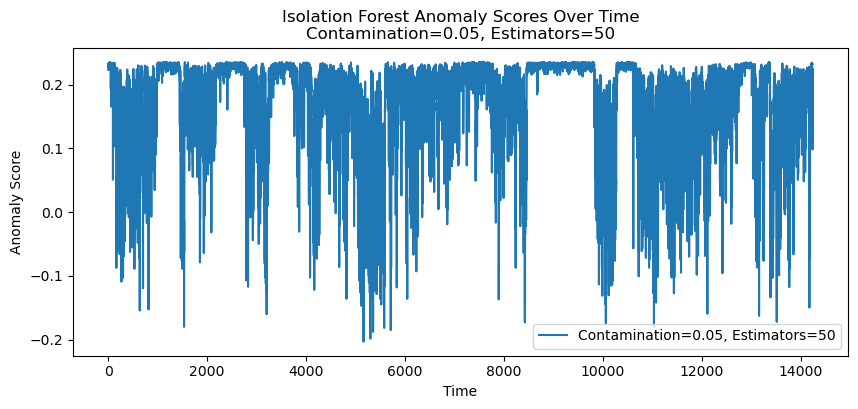

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


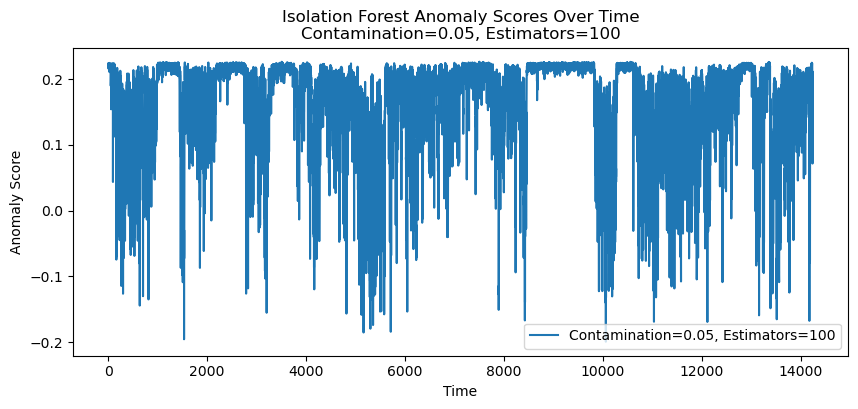

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


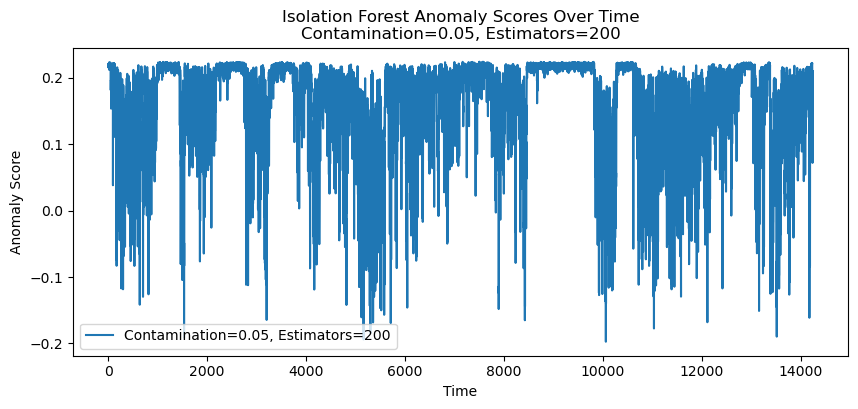

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


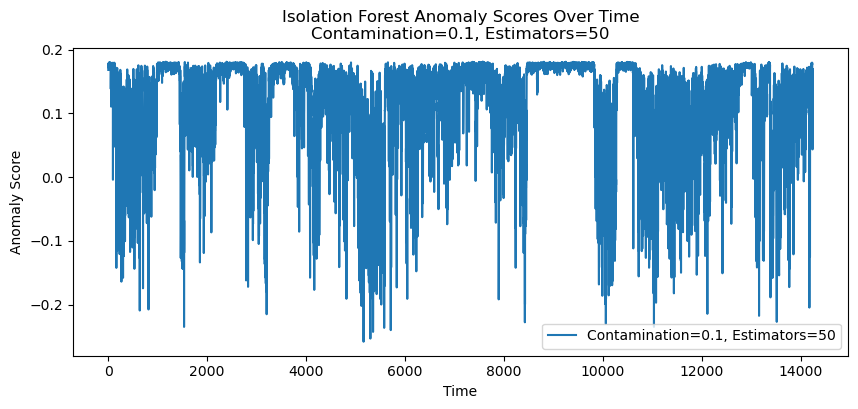

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


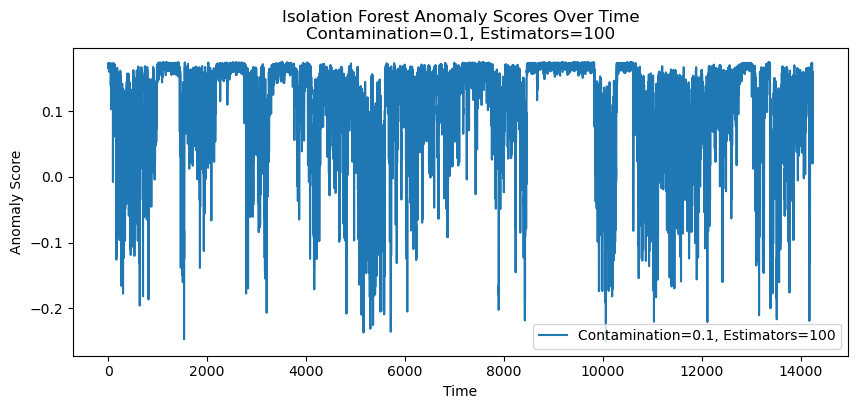

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


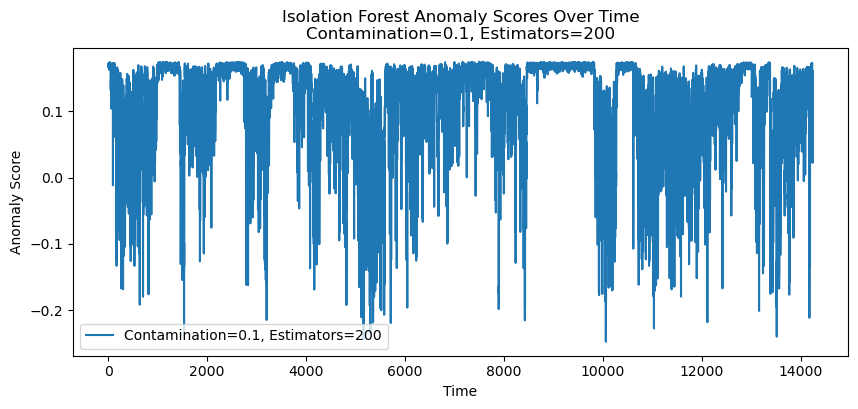

Summary of Anomalies Detected for Different Parameter Combinations:
   Contamination Rate  Number of Estimators  Number of Anomalies Detected
0                0.01                    50                           143
1                0.01                   100                           143
2                0.01                   200                           143
3                0.05                    50                           713
4                0.05                   100                           713
5                0.05                   200                           713
6                0.10                    50                          1425
7                0.10                   100                          1425
8                0.10                   200                          1425


In [3]:
# Run the model and get results for each combination of parameters
results_df = isolation_forest_with_params(data, contamination_rates, estimator_counts)

# Display the summary of results
print("Summary of Anomalies Detected for Different Parameter Combinations:")
print(results_df)


# Analyze Results

In [4]:
# Group results for better understanding
grouped_results = results_df.pivot("Contamination Rate", "Number of Estimators", "Number of Anomalies Detected")
print("Grouped Results for Analysis:")
print(grouped_results)


Grouped Results for Analysis:
Number of Estimators   50    100   200
Contamination Rate                    
0.01                   143   143   143
0.05                   713   713   713
0.10                  1425  1425  1425
